In [10]:
import torch
from torchvision.models import vgg16, VGG16_Weights
import torchvision.transforms as transforms
from src.lrp import LRPModel
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = vgg16(weights=VGG16_Weights.DEFAULT)
model.to(device)


lrp_model = LRPModel(model)

x = torch.rand(size=(1, 3, 224, 224)).to(device)

result = lrp_model.forward(x)

In [11]:
# Preprocessing transform for VGG

img_path ='../inputs/no-attack-lime/ILSVRC2012_val_00000001.JPEG'  # Replace with your image file
original_image = np.array(Image.open(img_path).convert('RGB'))

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

preprocessed_image = torch.stack([preprocess(Image.fromarray(original_image))]).to(device)

In [12]:
result = lrp_model.forward(preprocessed_image)

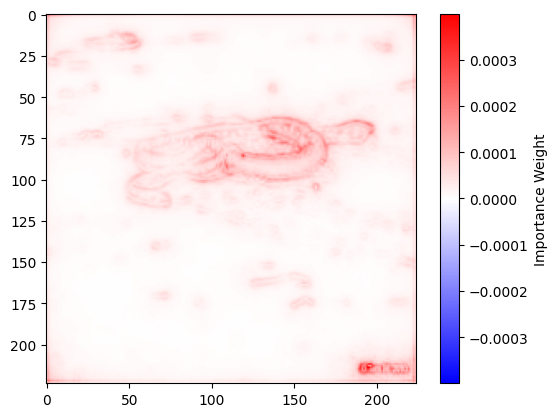

In [ ]:
shp = result.shape

r_min = abs(result.min())
r_max = abs(result.max())
if r_min > r_max:
    r_max = r_min

r_min = -r_max


plt.imshow(result, cmap="bwr", vmin=r_min, vmax=r_max )
plt.colorbar(label='Importance Weight')

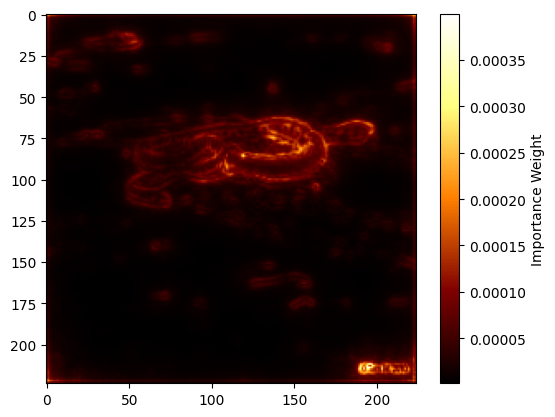

In [14]:
plt.imshow(result, cmap="afmhot")
plt.colorbar(label='Importance Weight')